In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi']= 200
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv(r'delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery Time'>

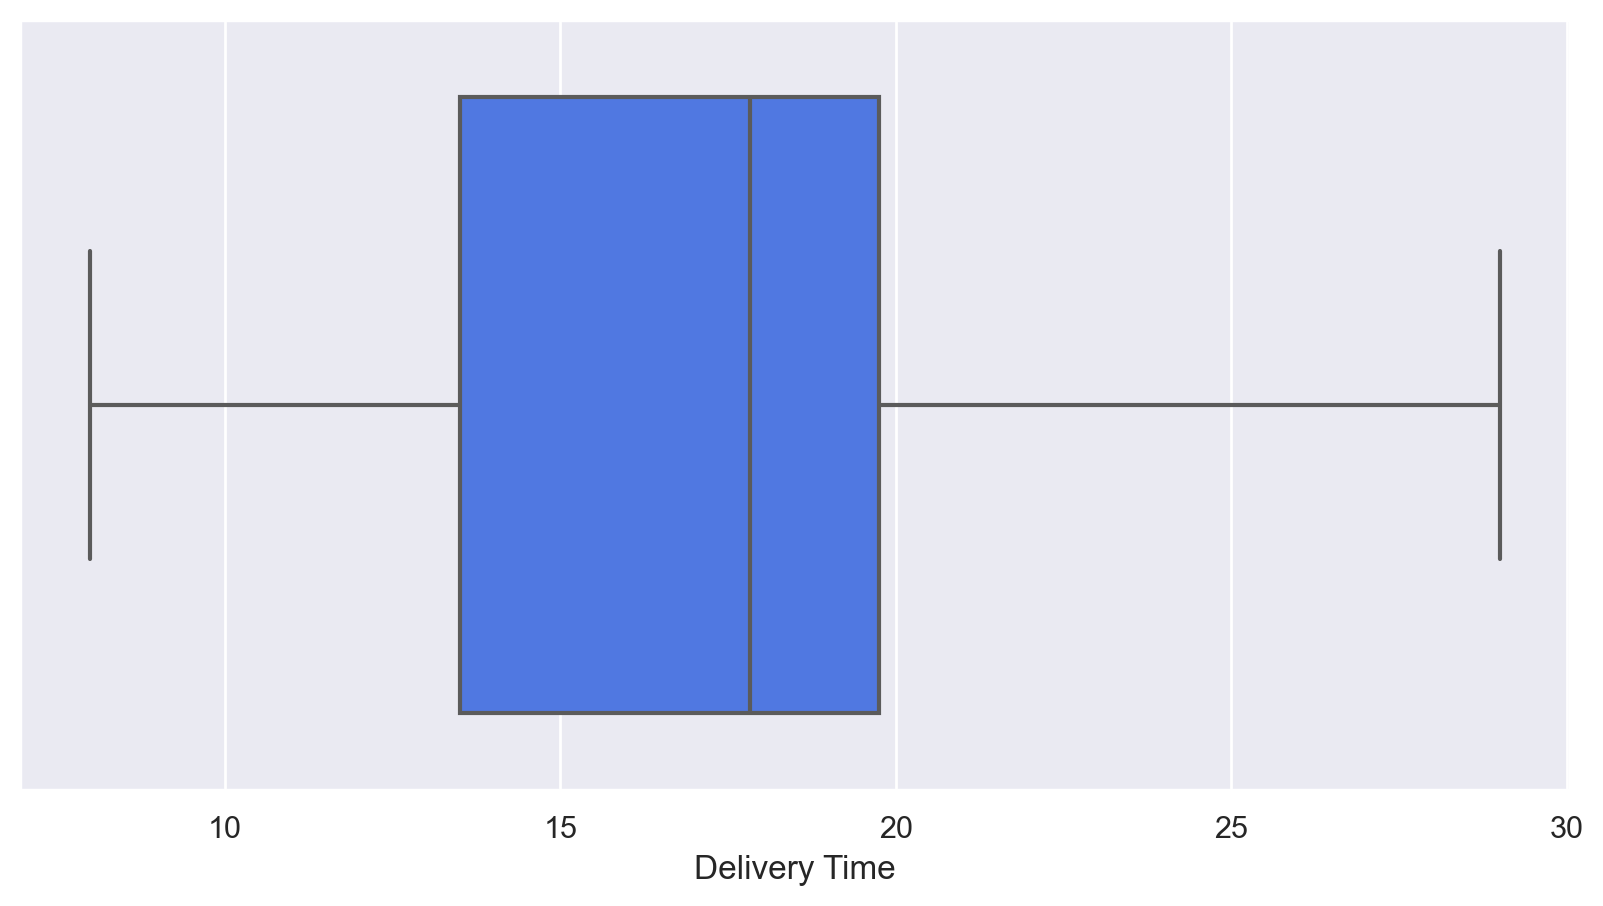

In [11]:
#Finding out outlier using Boxplot

sns.boxplot(df['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22276d518b0>,
 'caps': [<matplotlib.lines.Line2D at 0x22276d600d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22276d515e0>],
 'medians': [<matplotlib.lines.Line2D at 0x22276d60640>],
 'fliers': [<matplotlib.lines.Line2D at 0x22276d609d0>],
 'means': []}

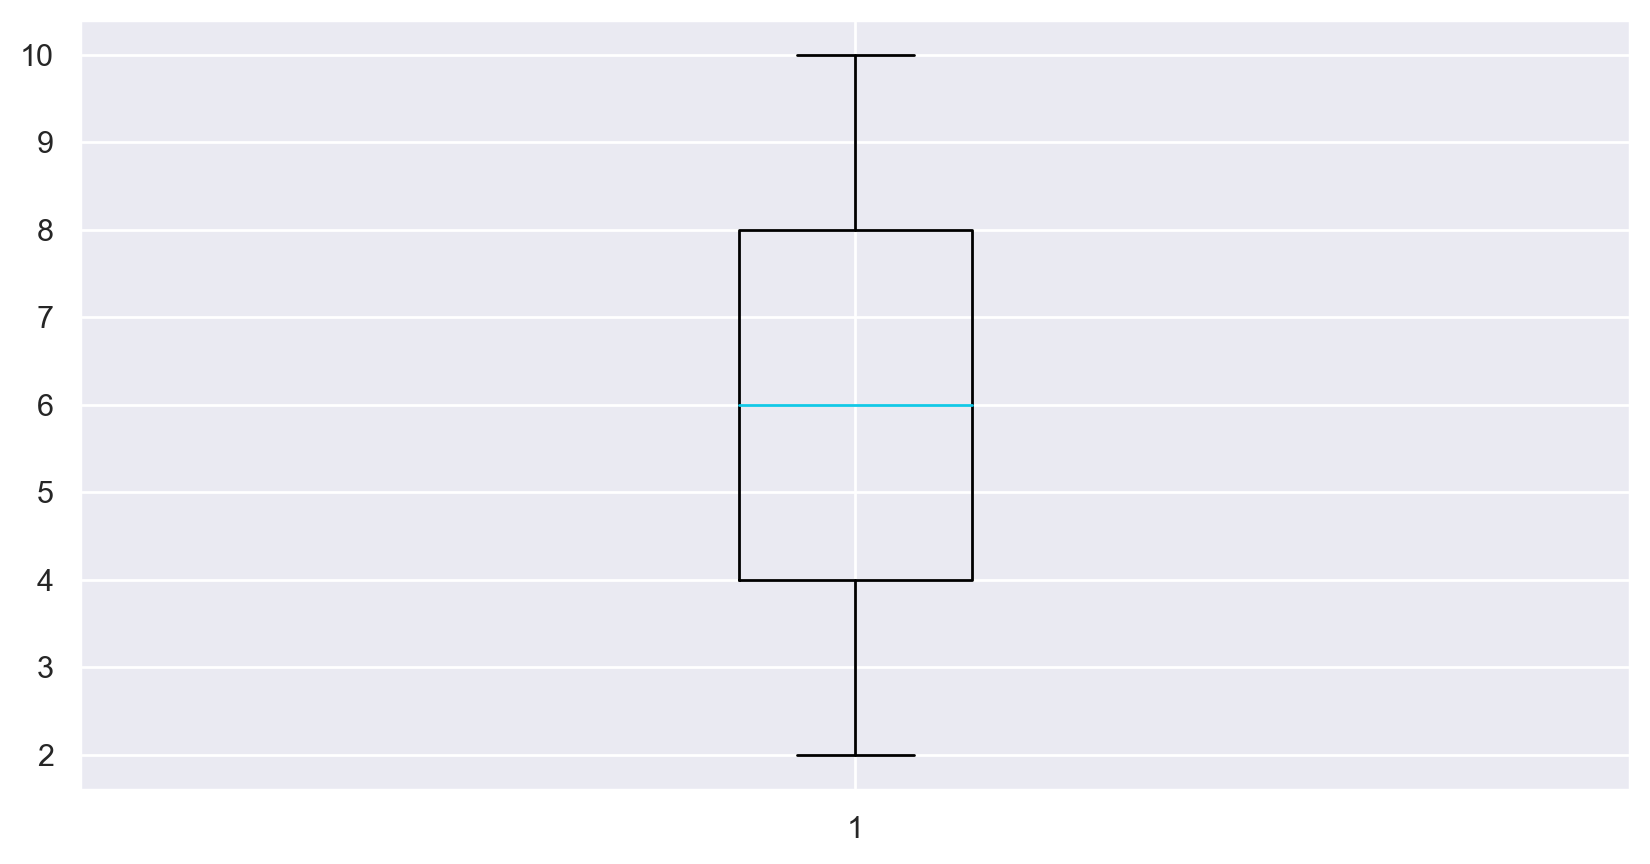

In [12]:
plt.boxplot(df['Sorting Time'])

# Understand the relationship

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

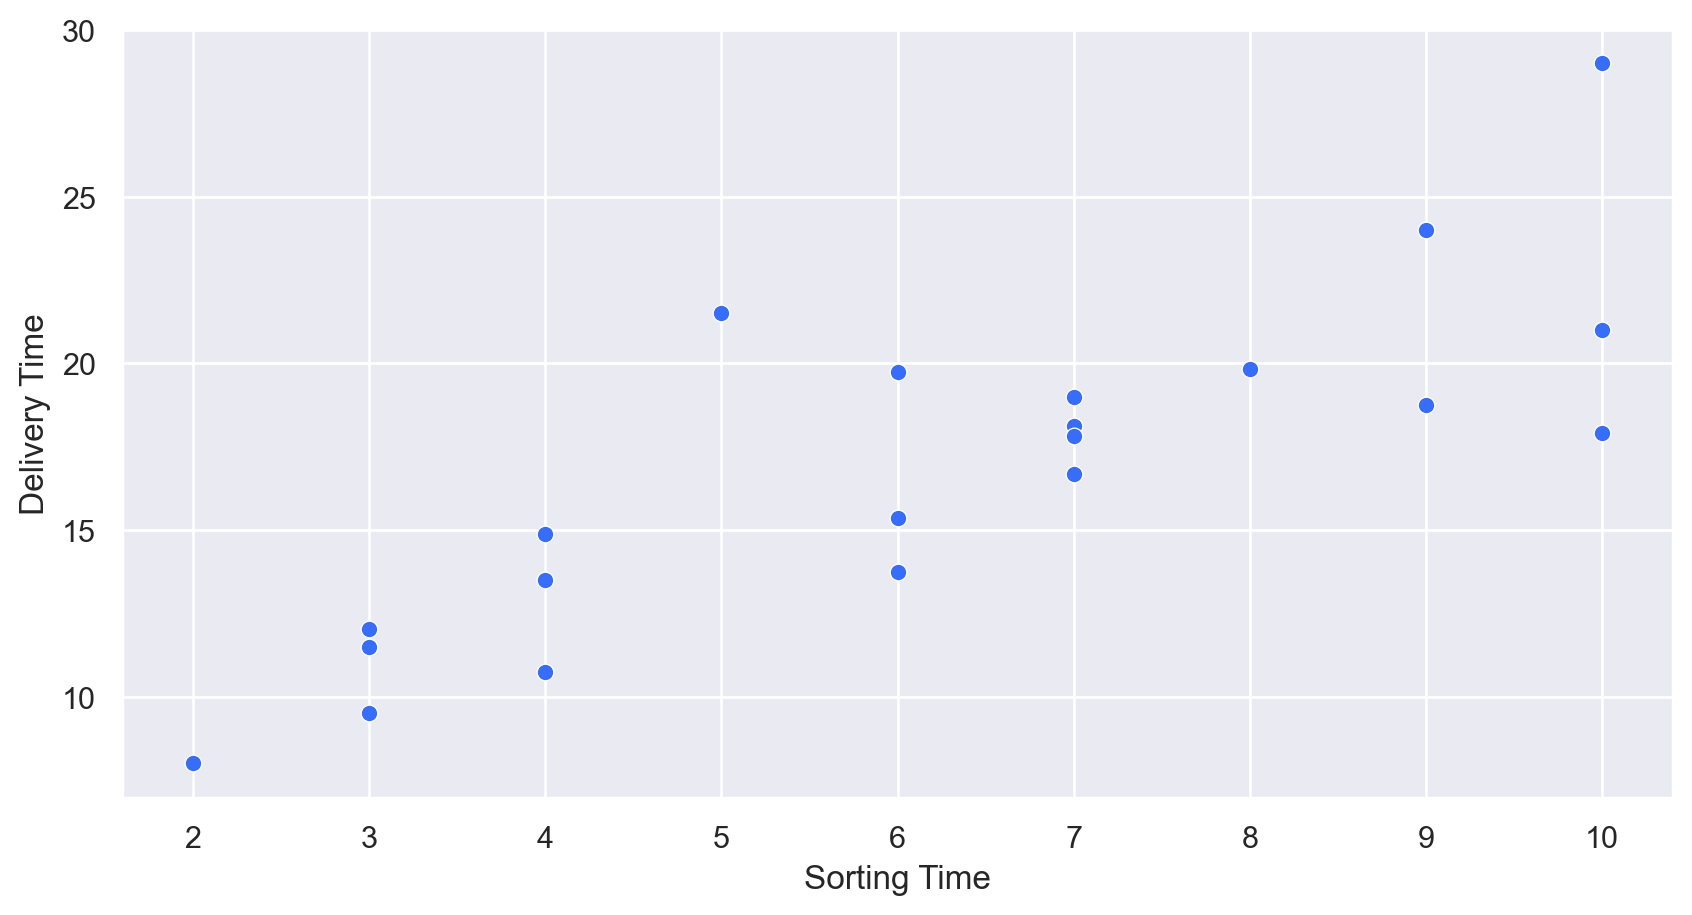

In [7]:
#Approach-1

sns.scatterplot(df['Sorting Time'], df['Delivery Time'])

In [8]:
#Approach-2

df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Text(0.5, 1.0, 'Sorting Time')

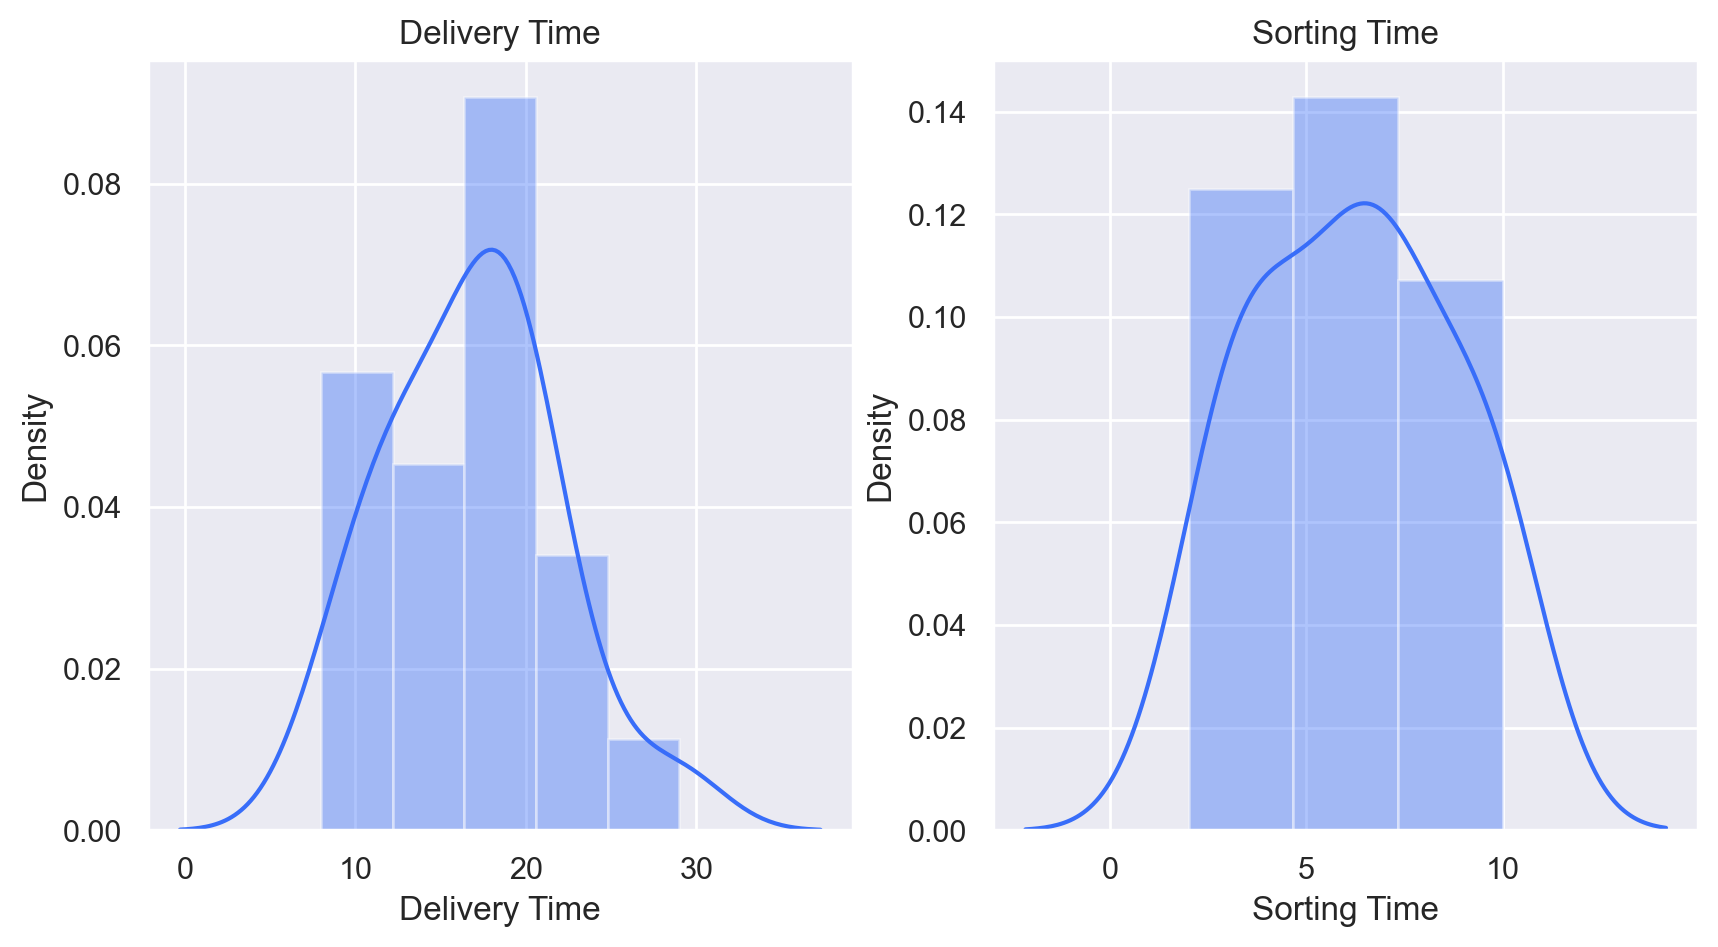

In [14]:
#plotting graph to check the data follows normal distribution or not

plt.subplot(1,2,1)
sns.distplot(df['Delivery Time'])
plt.title('Delivery Time')

plt.subplot(1,2,2)
sns.distplot(df['Sorting Time'])
plt.title('Sorting Time')

# Feature Engineering

In [35]:
#Renaming the column because in ols model does not accept space in between the column name
df.rename(columns={'Delivery Time':'Deliverytime', 'Sorting Time':'Sortingtime'},inplace=True)

<AxesSubplot:xlabel='Deliverytime', ylabel='Sortingtime'>

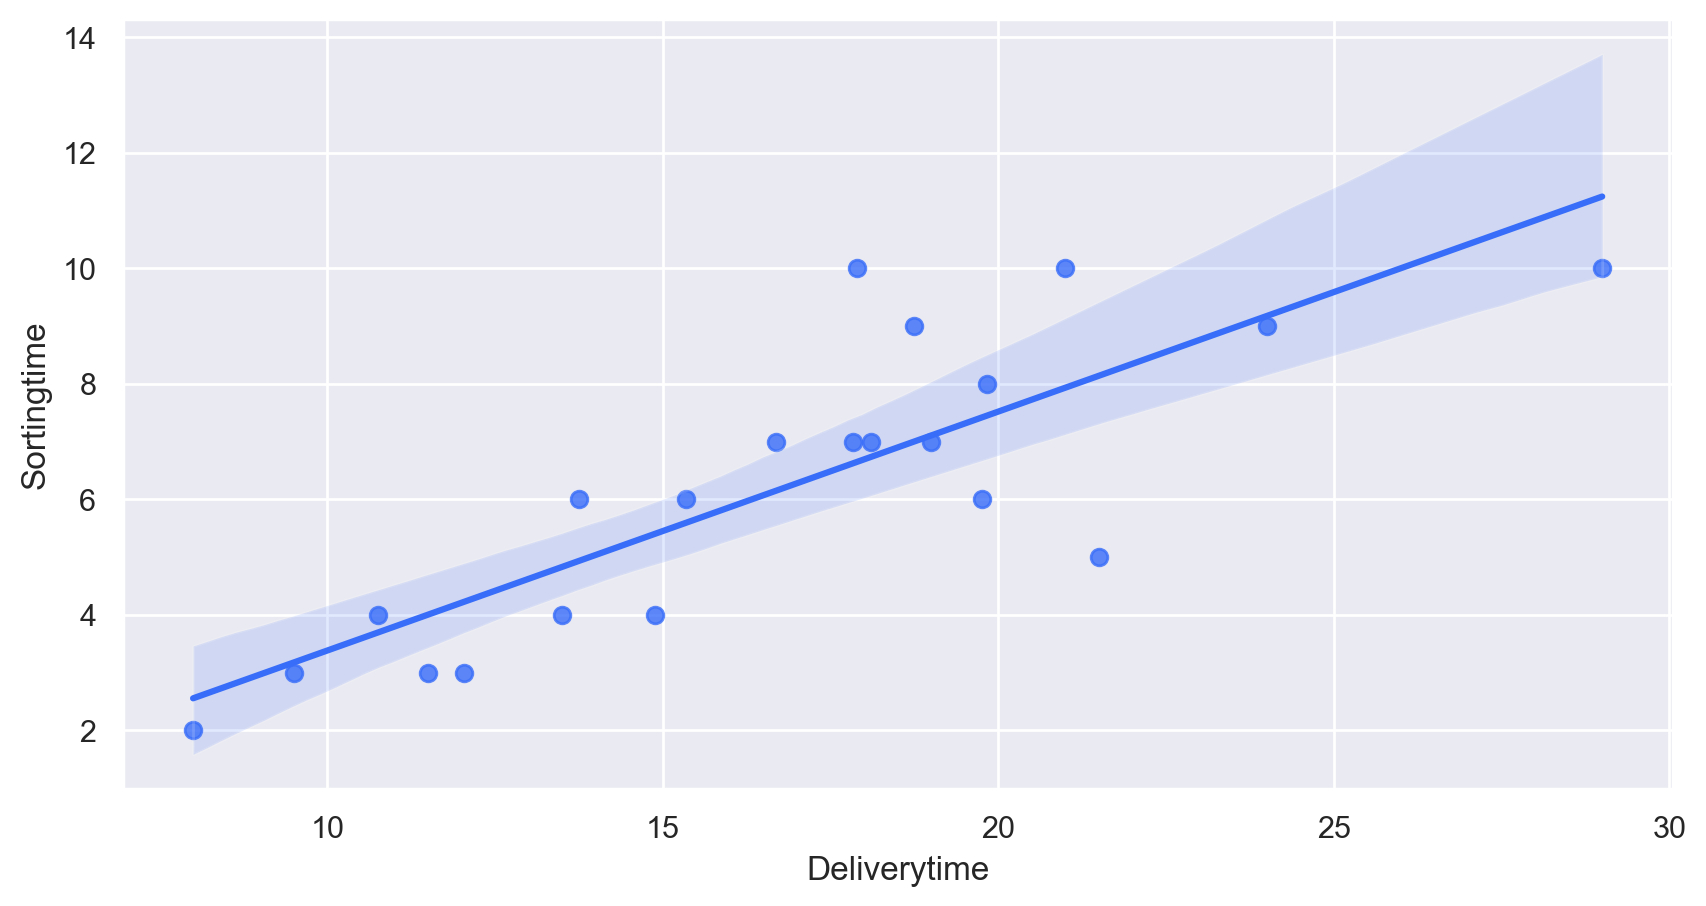

In [41]:
sns.regplot(x=df['Deliverytime'], y=df['Sortingtime'])

# Model building

In [36]:
# import statsmodel library
import statsmodels.formula.api as smf

In [37]:
#Create a model
model= smf.ols('Deliverytime ~ Sortingtime', data=df).fit()

In [38]:
c,m=model.params
c,m

(6.582733971997054, 1.6490198968312457)

In [39]:
model.pvalues

Intercept      0.001147
Sortingtime    0.000004
dtype: float64

In [42]:
#Checking model accuracy
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# model prediction

In [44]:
df.head()

,Deliverytime,Sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [45]:
sortingtime= 7

y=m*sortingtime+c
y

18.125873249815776